# Installation des dépendances

Pour pouvoir exécuter ce Notebook, l'environnement de développement doit être bien configuré. Puisque dans ce POC nous utilisons un réseau de neurones avec une architecture LSTM, il faut installer quelques dépendances.

In [ ]:
!pip install spacy datasets sentencepiece seaborn pandas -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.7 MB/s eta 0:00:00


De même, nous allons utiliser un jeu de données supplémentaire de HuggingFace pour enrichir notre base.

In [ ]:
!git lfs install
!git clone https://huggingface.co/datasets/Paul/hatecheck-french

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'hatecheck-french'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (15/15), 80.00 KiB | 900.00 KiB/s, done.


Enfin, spaCy nous permettra de faire des opérations de traitement du texte adapté à la langue française.

In [ ]:
!python -m spacy download fr_core_news_sm

2023-04-01 13:53:22.664843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 13:53:24.237026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-01 13:53:27.935989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-01 13:53:27.936612: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

Pour terminer, nous téléchargeons les données nettoyées prêtes pour l'entraînement.

In [2]:
!wget https://blent-keskia.s3.eu-west-3.amazonaws.com/poc/cyberharcelement/data_clean.csv

--2023-04-07 16:16:28--  https://blent-keskia.s3.eu-west-3.amazonaws.com/poc/cyberharcelement/data_clean.csv
Resolving blent-keskia.s3.eu-west-3.amazonaws.com (blent-keskia.s3.eu-west-3.amazonaws.com)... 16.12.18.10
Connecting to blent-keskia.s3.eu-west-3.amazonaws.com (blent-keskia.s3.eu-west-3.amazonaws.com)|16.12.18.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2149965 (2.0M) [text/csv]
Saving to: ‘data_clean.csv’

data_clean.csv      100%[===================>]   2.05M  1.72MB/s    in 1.2s    

2023-04-07 16:16:31 (1.72 MB/s) - ‘data_clean.csv’ saved [2149965/2149965]



In [3]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set()

data = pd.read_csv("data_clean.csv")
data.head()

,Unnamed: 0,Text,Group,Type,combined,combined_index
0,1435063,regardez tout le chemin jusqu'à la fin! ça en ...,other,non-hateful,other non-hateful,23
1,622624,apporter sur le robitussin ... la médecine all...,other,non-hateful,other non-hateful,23
2,830330,oh mon dieu. si vous n'avez jamais vu de radio...,other,non-hateful,other non-hateful,23
3,165558,"j'espère bien, mais je pourrais dépenser toute...",other,non-hateful,other non-hateful,23
4,1668,les français parlent aux français... ils n'y p...,other,hateful,other hateful,22


### ➡️ À toi de jouer

En utilisant le `LabelEncoder` de Scikit-Learn, créer la colonne `combined_index` qui permet de transformer chaque modalité de la colonne `combined` en un nombre entier.

In [4]:
len(data["combined"].unique())
data["combined"].value_counts()

other non-hateful               10748
other hateful                    1552
gay hateful                       741
african_descent hateful           631
special_needs hateful             550
muslims hateful                   448
women hateful                     431
immigrants hateful                402
left_wing_people hateful          314
indian/hindu hateful              283
arabs hateful                     241
gay non-hateful                   232
african_descent non-hateful       187
immigrants non-hateful            160
muslims non-hateful               156
women non-hateful                 135
special_needs non-hateful         131
asians hateful                     77
left_wing_people non-hateful       69
jews hateful                       60
arabs non-hateful                  57
indian/hindu non-hateful           46
christian hateful                  27
hispanics hateful                  22
jews non-hateful                   13
asians non-hateful                 12
christian no

In [5]:
len(data["combined_index"].unique())

28

# Modélisation avec un LSTM

Dans cette modélisation, nous allons utiliser un LSTM afin de classifier correctement chaque corpus.

Avant d'entraîner le modèle, assurons-nous bien d'avoir un GPU à disposition avec la commande suivante.

In [6]:
!nvidia-smi

Fri Apr  7 16:17:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Si rien ne s'affiche, alors cela signifie que tu n'as pas de GPU à disposition, et que l'entraînement sera beaucoup trop long. 😢

Vérifions que le GPU est bien reconnu par TensorFlow.

In [7]:
import tensorflow as tf

print("Nombre GPUs disponibles :", len(tf.config.list_physical_devices('GPU')))

Nombre GPUs disponibles : 1


In [8]:
import sklearn
import pandas as pd

from keras import layers
from keras.models import Sequential
from keras.layers import SpatialDropout1D, Embedding, LSTM, Dense, GRU, BatchNormalization, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras import regularizers

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Le nombre de mot les plus fréquents à conserver
MAX_NB_WORDS = 50000
# Le nombre de mots maximum dans chaque corpus
MAX_SEQUENCE_LENGTH = 250
# La dimension de la couche d'embedding
EMBEDDING_DIM = 50

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index

print('Trouvé %s tokens uniques.' % len(word_index))

Trouvé 22186 tokens uniques.


In [9]:
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Dimensions du tenseur des features :', X.shape)

Dimensions du tenseur des features : (17732, 250)


In [14]:
X

array([[    0,     0,     0, ...,   630,     4,   674],
       [    0,     0,     0, ...,   566,     7,    52],
       [    0,     0,     0, ...,   320,    11,  1869],
       ...,
       [    0,     0,     0, ...,  1440,    10,   199],
       [    0,     0,     0, ...,     1,   603,   757],
       [    0,     0,     0, ...,   103, 22185, 22186]], dtype=int32)

In [10]:
Y = pd.get_dummies(data["combined"]).values
print('Dimension du tenseur des labels :', Y.shape)

Dimension du tenseur des labels : (17732, 28)


In [16]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### ➡️ À toi de jouer

En utilisant la fonction `train_test_split`, sépare le jeu de données en deux sous-ensembles d'entraînement et de test avec un split à 10%.

In [14]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, stratify=Y_resampled, test_size=0.1, random_state=42)

# On sépare le jeu de données en sous-ensembles d'entraînement et de test
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.9, test_size=0.1)
#À CHERCHER pour la prochaine à faire un test_split representative de chaque classes
#fonction stack ou join ou concatene
#df.groupBy("y").count().as() / sum()

#print(X_train.shape, Y_train.shape)
#print(X_test.shape, Y_test.shape)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(X, Y):
    X_train = X[train_index]
    X_test = X[test_index]
    Y_train = Y[train_index]
    Y_test = Y[test_index]

print("Training set shape: X_train = {}, Y_train = {}".format(X_train.shape, Y_train.shape))
print("Test set shape: X_test = {}, Y_test = {}".format(X_test.shape, Y_test.shape))


#class_proportions = df.groupBy("Y").count().as() / sum()
#print(class_proportions)

Training set shape: X_train = (15958, 250), Y_train = (15958, 28)
Test set shape: X_test = (1774, 250), Y_test = (1774, 28)


### ➡️ À toi de jouer

Ajouter une couche `tf.compat.v1.keras.layers.CuDNNLSTM` au bon endroit du modèle `Sequential` ci-dessous.

In [15]:
tf.keras.regularizers.L2(l2=0.1)
tf.keras.regularizers.L1L2(l1=0.1, l2=0.1)


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(tf.compat.v1.keras.layers.CuDNNLSTM(units=64))  # Couche à ajouter
model.add(BatchNormalization())
model.add(Dense(Y.shape[1], activation='softmax'))

# FIN TODO

# On prépare le modèle avec une perte entropie croisée
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 10

# On entraîne le modèle
history = model.fit(
    X_train,
    Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)]
)

Epoch 1/20
1437/1437 [==============================] - 47s 26ms/step - loss: 1.2383 - accuracy: 0.6879 - val_loss: 1.2992 - val_accuracy: 0.6660
Epoch 2/20
1437/1437 [==============================] - 18s 13ms/step - loss: 0.5553 - accuracy: 0.8425 - val_loss: 0.8906 - val_accuracy: 0.7957
Epoch 3/20
1437/1437 [==============================] - 17s 12ms/step - loss: 0.3492 - accuracy: 0.9022 - val_loss: 0.8315 - val_accuracy: 0.8170
Epoch 4/20
1437/1437 [==============================] - 17s 12ms/step - loss: 0.2514 - accuracy: 0.9275 - val_loss: 0.7829 - val_accuracy: 0.8352
Epoch 5/20
1437/1437 [==============================] - 19s 13ms/step - loss: 0.1950 - accuracy: 0.9414 - val_loss: 0.8631 - val_accuracy: 0.8264
Epoch 6/20
1437/1437 [==============================] - 18s 12ms/step - loss: 0.1481 - accuracy: 0.9561 - val_loss: 1.0339 - val_accuracy: 0.8170
Epoch 7/20
1437/1437 [==============================] - 16s 11ms/step - loss: 0.1255 - accuracy: 0.9621 - val_loss: 1.1064 -

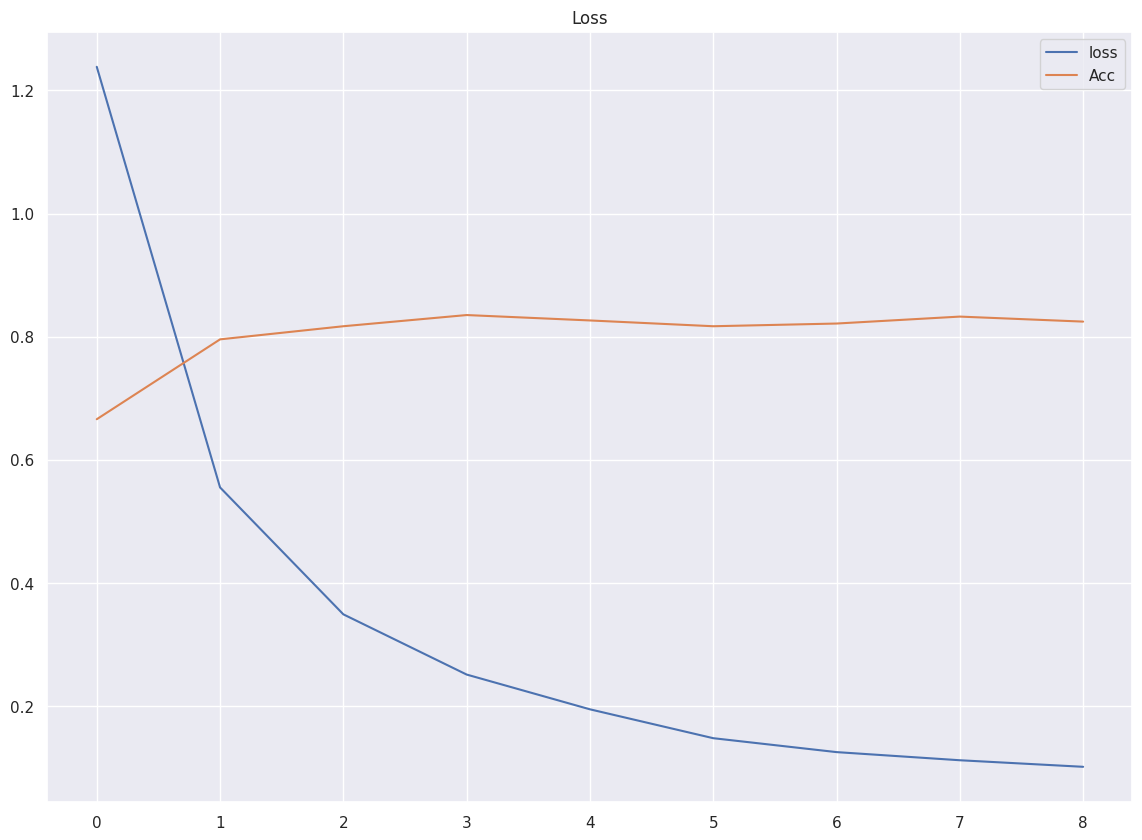

In [16]:
plt.figure(figsize=(14, 10))
plt.title('Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='Acc')

plt.legend()
plt.show()

# Inférence

Maintenant, essayons de charger notre modèle.

In [17]:
labels = ['african_descent/hateful', 'arabs/hateful', 'asians/hateful', 'christian/hateful', 'gay/hateful', 'hispanics/hateful', 'immigrants/hateful', 'indian/hindu/hateful',
         'jews/hateful', 'left_wing_people/hateful', 'muslims/hateful', 'other/hateful',  'special_needs/hateful', 
         'women/hateful', 'african_descent/non-hateful', 'arabs/non-hateful', 'asians/non-hateful', 'christian/non-hateful', 'gay/non-hateful', 'hispanics/non-hateful', 'immigrants/non-hateful',
         'indian/hindu-non-hateful', 'jews/non-hateful', 'left_wing_people/non-hateful', 'muslims/non-hateful', 'other/non-hateful', 
         'special_needs/non-hateful', 'women/non-hateful']

def predict(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    preds = model.predict(padded)
    i = np.argmax(preds[0])
    return labels[i], preds[0][i]

Et maintenant, il suffit de taper une phrase pour voir la sortie du modèle.

In [18]:
predict("fuck arabs")

1/1 [==============================] - 1s 688ms/step


('left_wing_people/non-hateful', 0.99990046)